In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

## Description
Churn prediction means detecting which customers are likely to leave a service or to cancel a subscription to a service. It is a critical prediction for many businesses because acquiring new clients often costs more than retaining existing ones.
We are predicting column 'Exited'

In [2]:
# read raw dataset
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
# describes numeric values
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
# see what the data looks like
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# check for nulls
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Visuals

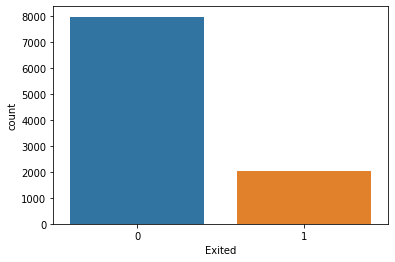

In [7]:
# visualise the dependent variable (what we are trying to predict)
sns.countplot(x = 'Exited', data = df)

Replacing gender and geog with dummies

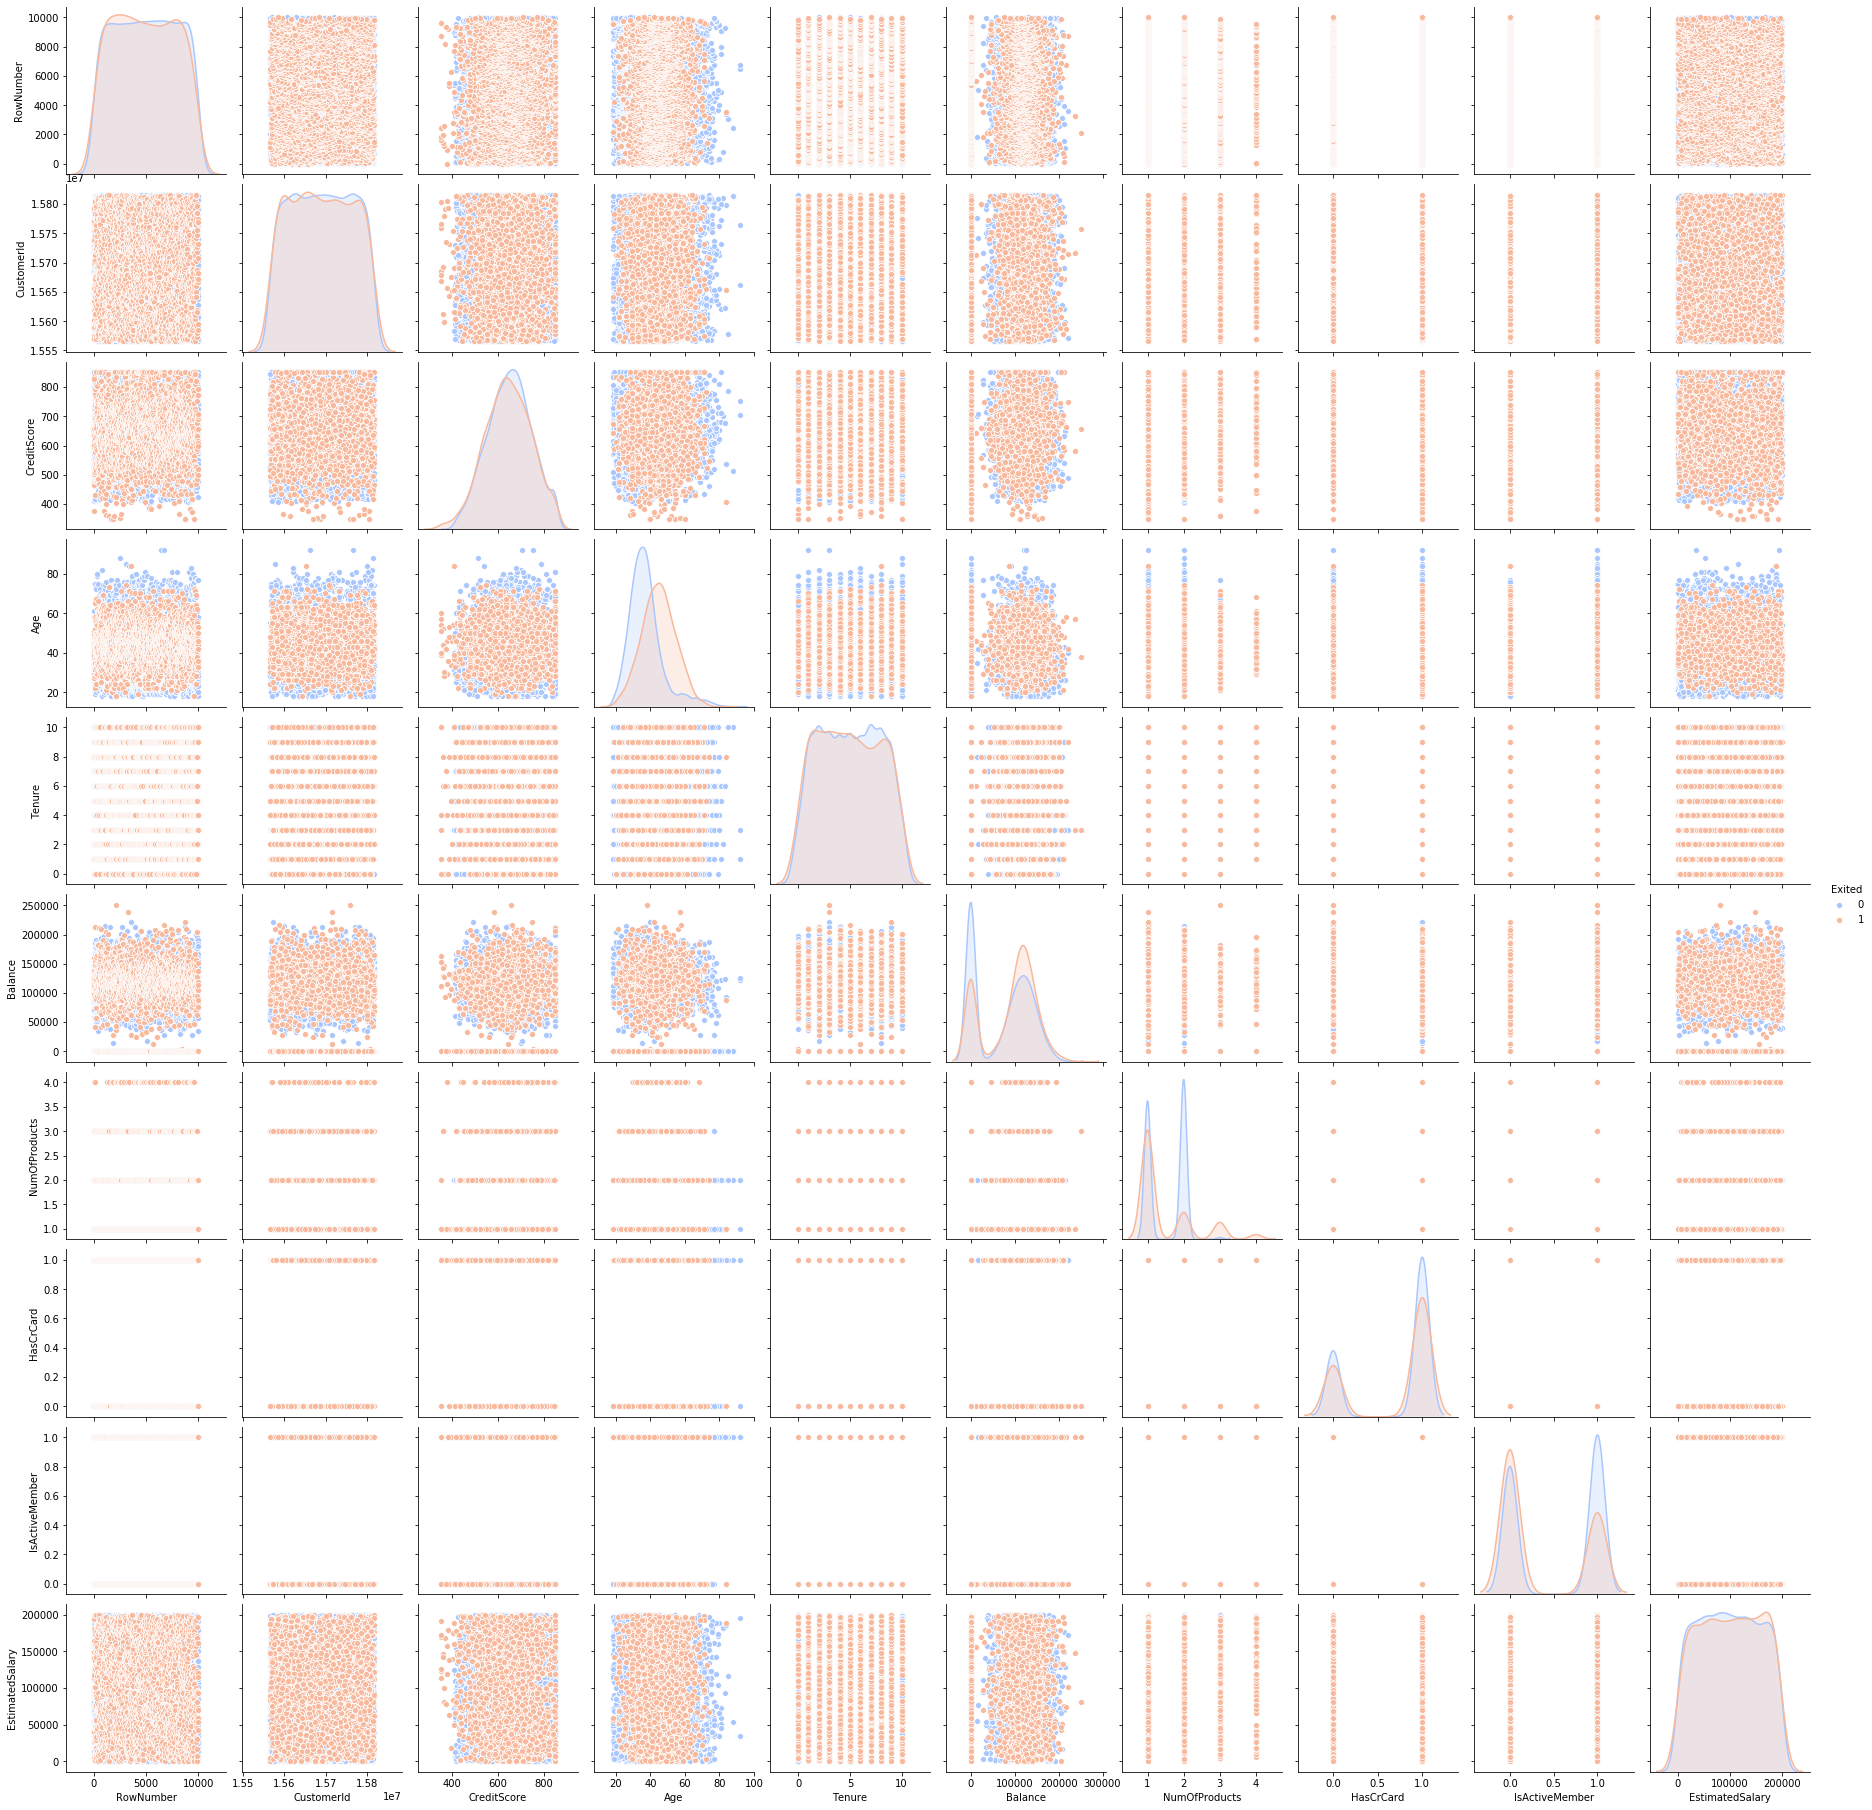

In [8]:
# see the relationships
sns.pairplot(df,hue='Exited',palette='coolwarm')

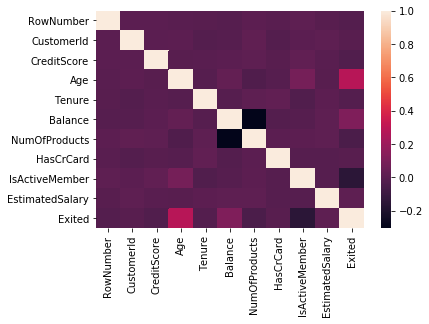

In [9]:
# which are the strongest features
sns.heatmap(df.corr())

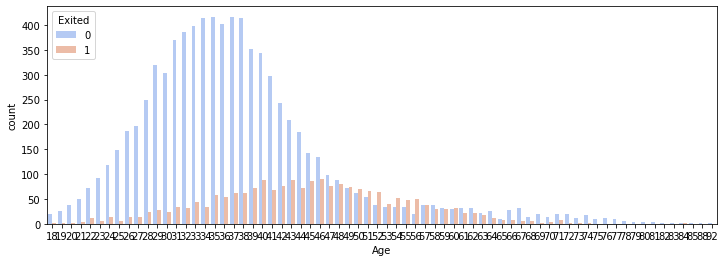

In [10]:
# have a closer look into the 'age' feature
plt.figure(figsize=(12,4))
sns.countplot(x='Age',data=df,hue='Exited',palette='coolwarm' )

## Feature Engineering

In [11]:
# methods selected only consider numerical features (not categorical)
# absence of male implies femal
gender_dummy = pd.get_dummies(df['Gender'],drop_first = True)
# absence of germany and spain does not imply france, so include dummy for all
geography_dummy = pd.get_dummies(df['Geography'])
df = pd.concat([df.drop('Gender',axis=1),gender_dummy],axis=1)
df = pd.concat([df.drop('Geography',axis=1),geography_dummy],axis=1)

In [12]:
# row not needed
df = df.drop('RowNumber', axis = 1)

In [13]:
# lowercase columns
df.columns = [x.lower() for x in df.columns]

In [14]:
# make columns easier to read
df = df.rename(columns={'customerid':'customer_id', 'creditscore':'credit_score', 
'numofproducts':'num_products', 'hascrcard':'has_credit_card', 
'isactivemember':'active_member', 'estimatedsalary':'estimated_salary'})

In [15]:
df.columns

Index(['customer_id', 'surname', 'credit_score', 'age', 'tenure', 'balance',
       'num_products', 'has_credit_card', 'active_member', 'estimated_salary',
       'exited', 'male', 'france', 'germany', 'spain'],
      dtype='object')

## Logistic Regression

Logistic Regression performs well when the dataset is linearly separable. It can interpret model coefficients as indicators of feature importance. It is also very fast and a common method used for binary classification.

In [16]:
# take selected features
X = df[['credit_score', 'age', 'tenure', 'balance',
       'num_products', 'has_credit_card', 'active_member', 'estimated_salary',
        'male', 'france', 'germany', 'spain']]
y = df['exited']
# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# initialise model
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
# predict
predictions = logmodel.predict(X_test)
# evaluate
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      2657
           1       0.45      0.08      0.14       643

    accuracy                           0.80      3300
   macro avg       0.63      0.53      0.51      3300
weighted avg       0.74      0.80      0.74      3300



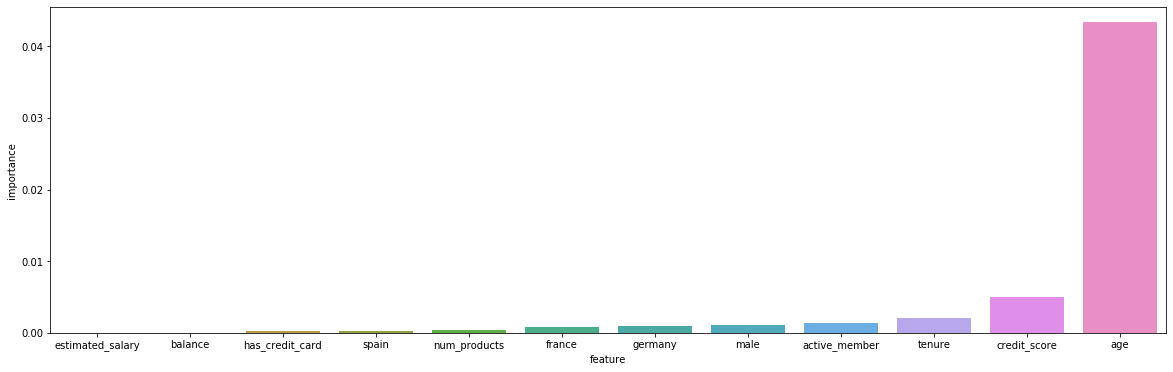

In [17]:
d = {'feature': X.columns, 'importance': logmodel.coef_[0]}
feat_imp = pd.DataFrame(data=d)

feat_imp['importance'] = feat_imp['importance'].abs()
feat_imp = feat_imp.sort_values(by=['importance'])

plt.figure(figsize=(20,6))
sns.barplot(x="feature", y="importance", data=feat_imp)

In [18]:
# try again with 
X = df[['credit_score', 'age', 'tenure', 'active_member','male', 'france', 'germany']]
y = df['exited']
# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# initialise model
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
# predict
predictions = logmodel.predict(X_test)
# evaluate
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      2657
           1       0.57      0.22      0.32       643

    accuracy                           0.82      3300
   macro avg       0.70      0.59      0.61      3300
weighted avg       0.78      0.82      0.78      3300



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Conclusions: This model initially has an average f1 score of 51%, and with feature engineering this increases to 61%. Not great.

## KNN

The KNN classification algorithm is often used for classifying the data, as well as for regression on continuous numeric data. It is used for not just binary classification but for multilevel classifications too. It is a non-parametric machine learning method implying that it doesn’t make any assumptions about the data. It also doesn’t make any generalizations, and simply checks the neighboring data points to determine the classification of unknown or uncategorized data points. 

In [19]:
X = df[['credit_score', 'age', 'tenure', 'balance',
       'num_products', 'has_credit_card', 'active_member', 'estimated_salary',
        'male', 'france', 'germany', 'spain']]
y = df['exited']

In [20]:
# need to use a scalar for knn to normalise the data in each axis
scaler = StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [21]:
scaled_features = scaler.transform(X)

In [22]:
#convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**
df_feat = pd.DataFrame(scaled_features,columns=X.columns)
df_feat.head()


,credit_score,age,tenure,balance,num_products,has_credit_card,active_member,estimated_salary,male,france,germany,spain
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,-1.095988,0.997204,-0.578736,-0.573809
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-1.095988,-1.002804,-0.578736,1.742740
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,-1.095988,0.997204,-0.578736,-0.573809
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-1.095988,0.997204,-0.578736,-0.573809
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-1.095988,-1.002804,-0.578736,1.742740


In [23]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,y,
                                                    test_size=0.30)

In [24]:
# Using n_neighbors=1
knn = KNeighborsClassifier(n_neighbors=1)

In [25]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [26]:
pred = knn.predict(X_test)

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[2099  306]
 [ 321  274]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      2405
           1       0.47      0.46      0.47       595

    accuracy                           0.79      3000
   macro avg       0.67      0.67      0.67      3000
weighted avg       0.79      0.79      0.79      3000



Average f1 score is 68%

In [27]:
# Looping through options for n
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

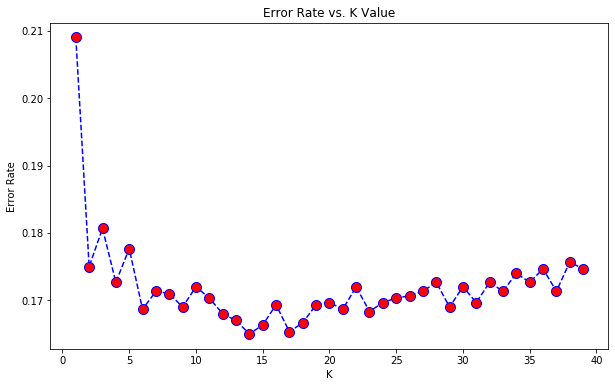

In [28]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [58]:
# Chose k=15
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [59]:
print('WITH K=30')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=30


[[2313   92]
 [ 407  188]]


              precision    recall  f1-score   support

           0       0.85      0.96      0.90      2405
           1       0.67      0.32      0.43       595

    accuracy                           0.83      3000
   macro avg       0.76      0.64      0.67      3000
weighted avg       0.81      0.83      0.81      3000



## Grid Search 

In [33]:
X = df[['credit_score', 'age', 'tenure', 'balance',
       'num_products', 'has_credit_card', 'active_member', 'estimated_salary',
        'male', 'france', 'germany', 'spain']]
y = df['exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)


svc_model = SVC()
svc_model.fit(X_train,y_train)
## Model Evaluation

predictions = svc_model.predict(X_test)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[2378    0]
 [ 622    0]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      2378
           1       0.00      0.00      0.00       622

    accuracy                           0.79      3000
   macro avg       0.40      0.50      0.44      3000
weighted avg       0.63      0.79      0.70      3000



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
## Gridsearch for automatic parameter tuning
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 


grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................... C=0.1, gamma=1, total=   1.2s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV] ................................... C=0.1, gamma=1, total=   1.2s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   1.2s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   1.2s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   1.2s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   1.2s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   1.2s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   1.2s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.8min finished


[[2378    0]
 [ 622    0]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      2378
           1       0.00      0.00      0.00       622

    accuracy                           0.79      3000
   macro avg       0.40      0.50      0.44      3000
weighted avg       0.63      0.79      0.70      3000



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
X = df[['credit_score', 'age', 'tenure', 'balance',
       'num_products', 'has_credit_card', 'active_member', 'estimated_salary',
        'male', 'france', 'germany', 'spain']]
y = df['exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

## Predictions and Evaluation of Decision Tree

predictions = dtree.predict(X_test)

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      2387
           1       0.48      0.50      0.49       613

    accuracy                           0.79      3000
   macro avg       0.67      0.68      0.68      3000
weighted avg       0.79      0.79      0.79      3000

[[2054  333]
 [ 308  305]]


From 44% to 68%